<h5>รายชื่อสมาชิก<h5>
<p> 1. วุฒิภัทร  วิวัฒนเจริญชัย 62090500421 </p>
<p> 2. นฤวดา   สนธิยานนท์   62090500431 </p>
<p> 3. ปวีณนุช    ปรีดา       62090500434 </p>
<p> 4. สุตาภัทร  ศรีสว่าง     62090500441 </p>
<p> 5. อภิชญา   จิไธสง      62090500442 </p>
<p> 6. โยษิตา   พรศิริอนันต์   62090500448 </p> 

In [103]:
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [104]:
#ดึงข้อมูลมาจาก yahoo!
HSI  = pdr.get_data_yahoo("^HSI", start ="2011-01-01", end="2021-12-31")
N225 = pdr.get_data_yahoo("^N225", start ="2011-01-01", end="2019-12-31")
DJI  = pdr.get_data_yahoo("^DJI", start ="2011-01-01", end="2019-12-31")
SSE  = pdr.get_data_yahoo("000001.SS", start ="2011-01-01", end="2019-12-31")

In [105]:
#หุ้นขึ้นหรือลง
def generateUpDown(data):
    data['Real'] = 0
    for i, j, k in zip(data['Close'], data['Close'].iloc[1:], range(0, len(data))):
        if i < j:
            data['Real'].iloc[k] = 1 #ลง
        elif i > j:
            data['Real'].iloc[k] = 0 #ขึ้น


In [106]:
def generateUpDown2(data):
    data['Forecast'] = 0
    for i, j, k in zip(data['y_pred'], data['y_pred'].iloc[1:], range(0, len(data))):
        if i < j:
            data['Forecast'].iloc[k] = 1 #ลง
        elif i > j:
            data['Forecast'].iloc[k] = 0 #ขึ้น  

<h2>HSI</h2>

In [107]:
#INDICATORS
HSI['MA']    = ta.MA(HSI['Close'], timeperiod=30, matype=0)
HSI['RSI14'] = ta.RSI(HSI['Close'], timeperiod=14)
HSI['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(HSI['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
HSI['OBV']   = ta.OBV(HSI['Close'], HSI['Volume'])
HSI['ROC']   = ta.ROC(HSI['Close'], timeperiod=10)
HSI['W%R']   = ta.WILLR(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)
HSI['ATR']   = ta.ATR(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)

HSI['SMA50'] = ta.SMA(HSI['Close'], timeperiod=50)
HSI['SMA200'] = ta.SMA(HSI['Close'], timeperiod=200)

HSI['EMA50']   = ta.MA(HSI['Close'], timeperiod=50, matype=0)
HSI['EMA200']   = ta.MA(HSI['Close'], timeperiod=200, matype=0)

HSI['BETA']  = ta.BETA(HSI['High'], HSI['Low'], timeperiod=5)
HSI['ADX']   = ta.ADX(HSI['High'], HSI['Low'], HSI['Close'], timeperiod=14)
HSI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX
Date,,,,,,,,,,,,,,,,,,,
2011-01-03,23443.529297,23057.519531,23135.640625,23436.050781,1.066930e+09,23436.050781,NaN,NaN,NaN,1.066930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,23695.609375,23408.089844,23477.310547,23668.480469,1.330693e+09,23668.480469,NaN,NaN,NaN,2.397623e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,23773.980469,23579.740234,23650.179688,23757.820312,1.277768e+09,23757.820312,NaN,NaN,NaN,3.675391e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,23861.220703,23698.380859,23861.220703,23786.300781,1.147689e+09,23786.300781,NaN,NaN,NaN,4.823080e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,23880.769531,23654.039062,23744.029297,23686.630859,1.287346e+09,23686.630859,NaN,NaN,NaN,3.535734e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,24502.679688,24062.259766,24502.679688,24080.519531,1.804123e+09,24080.519531,25298.881706,32.311086,-181.828568,1.807215e+11,-4.925192,-98.915981,382.716816,25026.557266,27336.604980,25026.557266,27336.604980,1.059575,16.161043
2021-11-29,24134.320312,23774.310547,23910.490234,23852.240234,1.741008e+09,23852.240234,25246.964714,29.872744,-250.382199,1.789805e+11,-6.059924,-96.048992,381.094884,24993.557461,27310.298682,24993.557461,27310.298682,0.772792,18.157605
2021-11-30,23888.369141,23175.369141,23782.859375,23475.259766,3.344858e+09,23475.259766,25169.899674,26.337965,-331.311466,1.756357e+11,-8.705525,-88.337193,404.802393,24962.398438,27281.231582,24962.398438,27281.231582,1.048165,20.745865


In [108]:
generateUpDown(HSI) #เพิ่ม column ว่าวันนั้นซื้อหรือไม่ซื้อ
HSI

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,,,,,,
2011-01-03,23443.529297,23057.519531,23135.640625,23436.050781,1.066930e+09,23436.050781,NaN,NaN,NaN,1.066930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-04,23695.609375,23408.089844,23477.310547,23668.480469,1.330693e+09,23668.480469,NaN,NaN,NaN,2.397623e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-05,23773.980469,23579.740234,23650.179688,23757.820312,1.277768e+09,23757.820312,NaN,NaN,NaN,3.675391e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-06,23861.220703,23698.380859,23861.220703,23786.300781,1.147689e+09,23786.300781,NaN,NaN,NaN,4.823080e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-07,23880.769531,23654.039062,23744.029297,23686.630859,1.287346e+09,23686.630859,NaN,NaN,NaN,3.535734e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,24502.679688,24062.259766,24502.679688,24080.519531,1.804123e+09,24080.519531,25298.881706,32.311086,-181.828568,1.807215e+11,-4.925192,-98.915981,382.716816,25026.557266,27336.604980,25026.557266,27336.604980,1.059575,16.161043,0
2021-11-29,24134.320312,23774.310547,23910.490234,23852.240234,1.741008e+09,23852.240234,25246.964714,29.872744,-250.382199,1.789805e+11,-6.059924,-96.048992,381.094884,24993.557461,27310.298682,24993.557461,27310.298682,0.772792,18.157605,0
2021-11-30,23888.369141,23175.369141,23782.859375,23475.259766,3.344858e+09,23475.259766,25169.899674,26.337965,-331.311466,1.756357e+11,-8.705525,-88.337193,404.802393,24962.398438,27281.231582,24962.398438,27281.231582,1.048165,20.745865,1


In [109]:
HSI = HSI.dropna() 
HSI1 = HSI.iloc[:, 3:4]
HSI2 = HSI.iloc[:, 6:21]
HSI  = pd.merge(HSI1, HSI2, on = 'Date')
HSI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,
2011-10-25,18968.199219,18282.029102,55.132015,-89.016462,-1.325197e+10,4.556433,-0.627126,522.496233,18942.258398,21980.387754,18942.258398,21980.387754,0.730911,28.537897,1
2011-10-26,19066.539062,18255.359375,56.012741,-25.707020,-1.157115e+10,4.021276,-2.408842,513.865085,18931.188984,21958.540195,18931.188984,21958.540195,0.769371,26.720552,1
2011-10-27,19688.699219,18277.298047,61.201637,73.818362,-8.422776e+09,4.962672,-0.199093,523.354632,18919.760977,21938.641289,18919.760977,21938.641289,0.461125,25.496891,1
2011-10-28,20019.240234,18309.758073,63.654676,177.320797,-4.677320e+09,8.201646,-10.164735,527.663704,18915.904180,21919.948389,18915.904180,21919.948389,0.800552,25.107925,0
2011-10-31,19864.869141,18332.537044,61.692891,244.077196,-6.424938e+09,5.249970,-16.363430,522.565516,18907.420977,21900.341230,18907.420977,21900.341230,1.265002,24.271146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,24080.519531,25298.881706,32.311086,-181.828568,1.807215e+11,-4.925192,-98.915981,382.716816,25026.557266,27336.604980,25026.557266,27336.604980,1.059575,16.161043,0
2021-11-29,23852.240234,25246.964714,29.872744,-250.382199,1.789805e+11,-6.059924,-96.048992,381.094884,24993.557461,27310.298682,24993.557461,27310.298682,0.772792,18.157605,0
2021-11-30,23475.259766,25169.899674,26.337965,-331.311466,1.756357e+11,-8.705525,-88.337193,404.802393,24962.398438,27281.231582,24962.398438,27281.231582,1.048165,20.745865,1


## Feature Scale -- HSI

In [110]:
X = HSI.drop(["Real","Close"], axis=1)  # Feature Matrix
y = HSI["Real"]
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)             


# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'MACD', 'ROC', 'W%R', 'BETA', 'ADX'], dtype='object')


In [111]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = HSI.loc[:, selected_features_rfe]
y = HSI["Real"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [112]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
updownclass = [] 
def PredictUpDownofEachClass(num_zeros, num_ones):
    if num_zeros < num_ones:
        updownclass.append(1)
        print('This classification is UP : ')
        print(updownclass)
    else:
        updownclass.append(0)
        print('This classification is DOWN : ')
        print(updownclass)

In [163]:
def PredictAllClass():
    PredictUpDownClass = []
    
    for i in range(len(updownclass)):
        if updownclass[i] == 1:
            PredictUpDownClass.append(1)
    PredictUpDownClass.
    print('This Index is UP')
    print('This Index is DOWN')

## Decision Tree -- HSI

In [169]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [170]:
# Prediction
# เอา model มาใช้
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [171]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()

In [172]:
PredictUpDownofEachClass(num_zeros, num_ones)

This classification is UP : 
[1]


In [143]:
num_ones

588

In [173]:
# Look at the actual y_test
# ดูคำตอบที่เรารู้อยู่แล้วมาเทียบ
y_test


Date
2019-03-12    0
2017-09-14    1
2016-01-26    1
2021-07-12    1
2021-04-07    1
             ..
2021-11-04    0
2013-08-16    0
2012-06-21    0
2018-03-09    1
2012-10-29    0
Name: Real, Length: 623, dtype: int64

In [174]:

from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.521669341894061
Prediction recall Score: 0.5224840724933506
Prediction F1_score:  0.5386996904024768
Prediction Precision:  0.5117647058823529


In [175]:
# See the confusion matrix
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[151, 166],
       [132, 174]], dtype=int64)

## Random Forest -- HSI

In [176]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [177]:
 # Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [178]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(num_zeros, num_ones)

This classification is UP : 
[1, 1]


In [179]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.49919743178170145
Prediction recall Score: 0.5070359374033525
Prediction F1_score:  0.6510067114093959
Prediction Precision:  0.49489795918367346


In [180]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20, 297],
       [ 15, 291]], dtype=int64)

## Artificial Neural Network (ANN) -- HSI

In [181]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [182]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [183]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(num_zeros, num_ones)

This classification is UP : 
[1, 1, 1]


In [184]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5184590690208668
Prediction recall Score: 0.5218242922826334
Prediction F1_score:  0.592391304347826
Prediction Precision:  0.5069767441860465


In [185]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[105, 212],
       [ 88, 218]], dtype=int64)

## Logistic Regression -- HSI

In [186]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [187]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [188]:
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()
PredictUpDownofEachClass(num_zeros, num_ones)

This classification is UP : 
[1, 1, 1, 1]


In [189]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.48796147672552165
Prediction recall Score: 0.49582482835405456
Prediction F1_score:  0.6435754189944134
Prediction Precision:  0.48896434634974534


In [190]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 16, 301],
       [ 18, 288]], dtype=int64)

## ROC AUC -- HSI

In [293]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
bl_probs = [0 for _ in range(len(y_test))]

# predict DTC probabilities
dtc_probs = dtc.predict_proba(X_test)

# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]

# predict RF probabilities
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict MLP probabilities
mlp_probs = mlp.predict_proba(X_test)

# keep probabilities for the positive outcome only
mlp_probs = mlp_probs[:, 1]

# predict MLP probabilities
lr_probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]



In [294]:
# calculate scores
bl_auc = roc_auc_score(y_test, bl_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc  = roc_auc_score(y_test, rf_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('NoSkill: ROC AUC=%.3f' % bl_auc)
print('DTC:     ROC AUC=%.3f' % dtc_auc)
print('RF :     ROC AUC=%.3f' % rf_auc)
print('MLP:     ROC AUC=%.3f' % mlp_auc)
print('LGTR :     ROC AUC=%.3f' % lr_auc)
# calculate ROC curves to plt
bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rf_fpr,  rf_tpr, _  = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.513
RF :     ROC AUC=0.503
MLP:     ROC AUC=0.515
LGTR :     ROC AUC=0.490


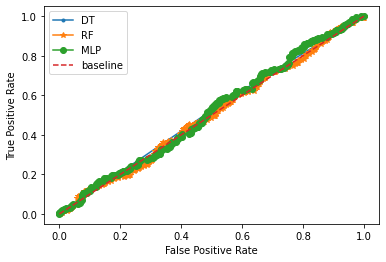

In [295]:
# plot the roc curve for the models
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DT')
plt.plot(rf_fpr,  rf_tpr,  marker='*', label='RF')
plt.plot(mlp_fpr, mlp_tpr, marker='o', label='MLP')
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [192]:
PredictAllClass()

1
1
1
1


<h2>Regression -- HSI</h2>

In [303]:

from sklearn.feature_selection import RFE
X = HSI.drop(["Real","MA","EMA50","EMA200","Close"], axis=1)  # Feature Matrix
y = HSI['Close']

cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)
#, n_features_to_select=6

# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

# Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['RSI14', 'ROC', 'W%R', 'BETA', 'ADX'], dtype='object')


Index(['RSI14', 'ROC', 'W%R', 'BETA', 'ADX'], dtype='object')


In [309]:
# Split the dataset into the Training set and Test set
#
X = HSI.loc[:, selected_features_rfe]
y = HSI["Close"]

from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Linear Regression -- HSI</h2>

In [310]:
## Linear Regression -- DJI
lr = LinearRegression().fit(X_train, y_train)

In [311]:
y_pred = lr.predict(X_test)
y_pred

array([25057.71263848, 24941.41443697, 24042.6589993 , 23801.84858232,
       24326.3922267 , 24652.30422275, 24627.02027608, 24225.78214574,
       24426.7663368 , 24060.00597775, 24207.25111246, 24161.62316745,
       24009.92488815, 24509.96068144, 24078.6436831 , 25567.4862369 ,
       23841.82088211, 24230.08159655, 24420.01964347, 25117.43490852,
       24446.83420196, 24159.00458765, 24484.96896631, 23530.9119484 ,
       24803.08113057, 24110.12390936, 24156.64761091, 24022.79100539,
       24743.85633446, 24381.94121771, 23045.16816825, 24338.80625812,
       24632.82910034, 24746.54507016, 24154.81450672, 25492.66196009,
       24948.76246141, 24092.05747608, 24638.95956663, 24947.9148216 ,
       25008.1544479 , 25183.70420887, 24218.91833973, 23885.37750286,
       24450.95090948, 23754.09841156, 24222.77754794, 24665.20425487,
       24040.92450356, 25069.54548343, 24087.07878587, 24693.39087655,
       24292.96879971, 24867.30632103, 24160.36398275, 23823.29715062,
      

In [312]:
mean_squared = np.sqrt(mean_squared_error(y_test, y_pred))
mean_squared #RMSE

3168.2091512380885

In [313]:
mean_r = r2_score(y_test, y_pred)
mean_r #R2 Score Accuracy

0.05471932913775701

<h2> AdaBoostRegressor -- Regression -- HSI</h2>

In [316]:
X = HSI.drop(["Real","MA","EMA50","EMA200","Close"], axis=1)  # Feature Matrix
y = HSI['Close']
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)
#, n_features_to_select=6

# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

# Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'ROC', 'W%R', 'BETA', 'ADX'], dtype='object')


In [317]:
X = HSI.loc[:, selected_features_rfe]
y = HSI["Close"]
X

,RSI14,ROC,W%R,BETA,ADX
Date,,,,,
2011-10-25,55.132015,4.556433,-0.627126,0.730911,28.537897
2011-10-26,56.012741,4.021276,-2.408842,0.769371,26.720552
2011-10-27,61.201637,4.962672,-0.199093,0.461125,25.496891
2011-10-28,63.654676,8.201646,-10.164735,0.800552,25.107925
2011-10-31,61.692891,5.249970,-16.363430,1.265002,24.271146
...,...,...,...,...,...
2021-11-26,32.311086,-4.925192,-98.915981,1.059575,16.161043
2021-11-29,29.872744,-6.059924,-96.048992,0.772792,18.157605
2021-11-30,26.337965,-8.705525,-88.337193,1.048165,20.745865


In [318]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [319]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train, y_train)

In [320]:
y_pred = ada.predict(X_test)
y_pred

array([25159.49322412, 25048.61038292, 24564.5668179 , 24464.89534071,
       24646.27658327, 25133.87344308, 25048.61038292, 24746.39454426,
       24646.27658327, 24564.5668179 , 24746.39454426, 24464.89534071,
       24564.5668179 , 25316.37758155, 24464.89534071, 25167.73409402,
       24564.5668179 , 24746.39454426, 24746.39454426, 24594.03547049,
       24464.89534071, 24464.89534071, 25133.87344308, 22443.71457497,
       24564.5668179 , 24464.89534071, 24564.5668179 , 24564.5668179 ,
       24673.54828758, 24746.39454426, 22443.71457497, 25048.61038292,
       25167.73409402, 25048.61038292, 24464.89534071, 25133.87344308,
       24673.54828758, 24673.54828758, 24731.40185793, 24594.03547049,
       24731.40185793, 25159.49322412, 24594.03547049, 24564.5668179 ,
       24464.89534071, 24564.5668179 , 24564.5668179 , 24646.27658327,
       24047.88392382, 25167.73409402, 24464.89534071, 24594.03547049,
       25167.73409402, 24731.40185793, 24746.39454426, 24564.5668179 ,
      

In [321]:
mean_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_2 #RMSE

3136.2002616419186

In [322]:
mean_r2 = metrics.r2_score(y_test, y_pred)
mean_r2 #R2 Score Accuracy

0.0737234641294996

## N225

In [399]:
#INDICATORS
N225['MA']    = ta.MA(N225['Close'], timeperiod=30, matype=0)
N225['RSI14'] = ta.RSI(N225['Close'], timeperiod=14)
N225['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(N225['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
N225['OBV']   = ta.OBV(N225['Close'], N225['Volume'])
N225['ROC']   = ta.ROC(N225['Close'], timeperiod=10)
N225['W%R']   = ta.WILLR(N225['High'], N225['Low'], N225['Close'], timeperiod=14)
N225['ATR']   = ta.ATR(N225['High'], N225['Low'], N225['Close'], timeperiod=14)

N225['EMA50']   = ta.MA(N225['Close'], timeperiod=50, matype=0)
N225['EMA200']   = ta.MA(N225['Close'], timeperiod=200, matype=0)

N225['BETA']  = ta.BETA(N225['High'], N225['Low'], timeperiod=5)
N225['ADX']   = ta.ADX(N225['High'], N225['Low'], N225['Close'], timeperiod=14)
N225

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX
Date,,,,,,,,,,,,,,,,,
2011-01-04,10409.169922,10321.280273,10352.190430,10398.099609,114100000.0,10398.099609,NaN,NaN,NaN,1.141000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,10413.450195,10358.009766,10387.950195,10380.769531,114600000.0,10380.769531,NaN,NaN,NaN,-5.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,10530.110352,10477.519531,10477.519531,10529.759766,166000000.0,10529.759766,NaN,NaN,NaN,1.655000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,10550.709961,10503.019531,10506.719727,10541.040039,161800000.0,10541.040039,NaN,NaN,NaN,3.273000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,10538.389648,10476.290039,10484.620117,10510.679688,138500000.0,10510.679688,NaN,NaN,NaN,1.888000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,23853.560547,23796.349609,23839.179688,23830.580078,37900000.0,23830.580078,23474.896354,61.141163,213.294094,2.325650e+10,1.795759,-31.341204,183.482400,23219.745977,21825.578164,1.056083,24.634421
2019-12-25,23824.849609,23782.869141,23813.589844,23782.869141,31600000.0,23782.869141,23490.329688,59.129339,200.352797,2.322490e+10,1.671563,-40.693699,173.784438,23259.425977,21837.566709,1.067137,24.285338
2019-12-26,23931.509766,23775.400391,23787.699219,23924.919922,40300000.0,23924.919922,23516.441992,63.029821,199.262068,2.326520e+10,2.134956,-21.940830,172.521934,23293.780156,21849.177861,0.248131,24.424625


In [400]:
generateUpDown(N225) #เพิ่ม column ว่าวันนั้นซื้อหรือไม่ซื้อ
N225

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,,,,
2011-01-04,10409.169922,10321.280273,10352.190430,10398.099609,114100000.0,10398.099609,NaN,NaN,NaN,1.141000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-05,10413.450195,10358.009766,10387.950195,10380.769531,114600000.0,10380.769531,NaN,NaN,NaN,-5.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-06,10530.110352,10477.519531,10477.519531,10529.759766,166000000.0,10529.759766,NaN,NaN,NaN,1.655000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-07,10550.709961,10503.019531,10506.719727,10541.040039,161800000.0,10541.040039,NaN,NaN,NaN,3.273000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-11,10538.389648,10476.290039,10484.620117,10510.679688,138500000.0,10510.679688,NaN,NaN,NaN,1.888000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,23853.560547,23796.349609,23839.179688,23830.580078,37900000.0,23830.580078,23474.896354,61.141163,213.294094,2.325650e+10,1.795759,-31.341204,183.482400,23219.745977,21825.578164,1.056083,24.634421,0
2019-12-25,23824.849609,23782.869141,23813.589844,23782.869141,31600000.0,23782.869141,23490.329688,59.129339,200.352797,2.322490e+10,1.671563,-40.693699,173.784438,23259.425977,21837.566709,1.067137,24.285338,1
2019-12-26,23931.509766,23775.400391,23787.699219,23924.919922,40300000.0,23924.919922,23516.441992,63.029821,199.262068,2.326520e+10,2.134956,-21.940830,172.521934,23293.780156,21849.177861,0.248131,24.424625,0


In [401]:
N225 = N225.dropna() 
N225_1 = N225.iloc[:, 3:4]
N225_2 = N225.iloc[:, 6:21]
N225  = pd.merge(N225_1, N225_2, on = 'Date')
N225

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,
2011-10-25,8762.309570,8664.092415,51.184852,4.493999,9.938000e+08,-0.129593,-26.269235,137.563838,8741.500664,9623.830908,0.720234,15.951993,0
2011-10-26,8748.469727,8664.452734,50.634611,5.328295,8.850000e+08,0.109503,-36.445939,138.897866,8737.195664,9615.582759,0.840011,15.163934,1
2011-10-27,8926.540039,8677.481738,57.034550,20.126263,1.024900e+09,1.170658,-0.000000,142.888769,8733.998262,9608.311611,0.925348,14.487671,1
2011-10-28,9050.469727,8691.945736,60.839669,41.376883,1.190000e+09,3.458061,-8.101460,144.103118,8732.859062,9600.915161,1.342166,14.668130,0
2011-10-31,8988.389648,8707.606380,58.065526,52.602441,1.056200e+09,1.225168,-32.167580,145.524324,8731.481660,9593.151909,1.469227,15.135750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,23830.580078,23474.896354,61.141163,213.294094,2.325650e+10,1.795759,-31.341204,183.482400,23219.745977,21825.578164,1.056083,24.634421,0
2019-12-25,23782.869141,23490.329688,59.129339,200.352797,2.322490e+10,1.671563,-40.693699,173.784438,23259.425977,21837.566709,1.067137,24.285338,1
2019-12-26,23924.919922,23516.441992,63.029821,199.262068,2.326520e+10,2.134956,-21.940830,172.521934,23293.780156,21849.177861,0.248131,24.424625,0


## Feature Selection -- N225

In [402]:
X = N225.drop(["Real","Close"], axis=1)  # Feature Matrix
y = N225["Real"]

cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)             


# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'ROC', 'W%R', 'BETA', 'ADX'], dtype='object')


In [403]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = N225.loc[:, selected_features_rfe]
y = N225["Real"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [404]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree -- N225

In [405]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) #training เพื่อสร้าง model

DecisionTreeClassifier()

In [406]:

y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [337]:
y_test

Date
2019-03-12    0
2017-09-14    1
2016-01-26    1
2021-07-12    1
2021-04-07    1
             ..
2021-11-04    0
2013-08-16    0
2012-06-21    0
2018-03-09    1
2012-10-29    0
Name: Real, Length: 623, dtype: int64

In [407]:

from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4960159362549801
Prediction recall Score: 0.49671852990139587
Prediction F1_score:  0.5143953934740884
Prediction Precision:  0.5425101214574899


In [408]:
# See the confusion matrix
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[115, 113],
       [140, 134]], dtype=int64)

## Random Forest -- N225

In [340]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [341]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [342]:
y_test

Date
2019-03-12    0
2017-09-14    1
2016-01-26    1
2021-07-12    1
2021-04-07    1
             ..
2021-11-04    0
2013-08-16    0
2012-06-21    0
2018-03-09    1
2012-10-29    0
Name: Real, Length: 623, dtype: int64

In [343]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4959871589085072
Prediction recall Score: 0.5037112636852848
Prediction F1_score:  0.647191011235955
Prediction Precision:  0.4931506849315068


In [344]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 21, 296],
       [ 18, 288]], dtype=int64)

## Artificial Neural Network (ANN) -- N225

In [345]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [346]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [347]:
y_test

Date
2019-03-12    0
2017-09-14    1
2016-01-26    1
2021-07-12    1
2021-04-07    1
             ..
2021-11-04    0
2013-08-16    0
2012-06-21    0
2018-03-09    1
2012-10-29    0
Name: Real, Length: 623, dtype: int64

In [348]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.49919743178170145
Prediction recall Score: 0.5021030494216614
Prediction F1_score:  0.5666666666666667
Prediction Precision:  0.4927536231884058


In [349]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[107, 210],
       [102, 204]], dtype=int64)

##  Logistic Regression -- N225

In [350]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [351]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [352]:
y_test

Date
2019-03-12    0
2017-09-14    1
2016-01-26    1
2021-07-12    1
2021-04-07    1
             ..
2021-11-04    0
2013-08-16    0
2012-06-21    0
2018-03-09    1
2012-10-29    0
Name: Real, Length: 623, dtype: int64

In [353]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4799357945425361
Prediction recall Score: 0.4884486917795509
Prediction F1_score:  0.6470588235294118
Prediction Precision:  0.4852941176470588


In [354]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2, 315],
       [  9, 297]], dtype=int64)

## ROC AUC -- N225

In [355]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
blprobs = [0 for _ in range(len(y_test))]

# predict DTC probabilities
dtc_probs = dtc.predict_proba(X_test)

# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]

# predict RF probabilities
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict MLP probabilities
mlp_probs = mlp.predict_proba(X_test)

# keep probabilities for the positive outcome only
mlp_probs = mlp_probs[:, 1]

# predict MLP probabilities
lr_probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [356]:
# calculate scores
bl_auc = roc_auc_score(y_test, bl_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc  = roc_auc_score(y_test, rf_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('NoSkill: ROC AUC=%.3f' % bl_auc)
print('DTC:     ROC AUC=%.3f' % dtc_auc)
print('RF :     ROC AUC=%.3f' % rf_auc)
print('MLP:     ROC AUC=%.3f' % mlp_auc)
print('LGTR :     ROC AUC=%.3f' % lr_auc)
# calculate ROC curves to plt
bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rf_fpr,  rf_tpr, _  = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.500
RF :     ROC AUC=0.508
MLP:     ROC AUC=0.506
LGTR :     ROC AUC=0.481


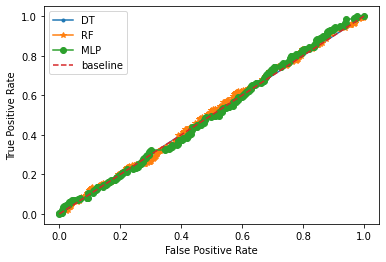

In [357]:
# plot the roc curve for the models
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DT')
plt.plot(rf_fpr,  rf_tpr,  marker='*', label='RF')
plt.plot(mlp_fpr, mlp_tpr, marker='o', label='MLP')
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## Regresssion--N225

In [359]:
X = N225.drop(["Real","MA","EMA50","EMA200","Close"], axis=1)  # Feature Matrix
y = N225['Close']
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)
#, n_features_to_select=6

# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

# Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'ROC', 'W%R', 'BETA'], dtype='object')


In [361]:
# Split the dataset into the Training set and Test set
#
X = N225.loc[:, selected_features_rfe]
y = N225["Close"]

from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [363]:
## Linear Regression -- DJI
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

array([25433.20220068, 24009.77084971, 24148.21671487, 23851.98653773,
       27027.15540422, 24645.48445842, 24426.83535656, 22352.39129579,
       22906.29458511, 24526.02338337, 25170.70038337, 27457.36503134,
       23784.01303867, 27514.31036762, 25095.2746389 , 26249.1214362 ,
       24782.68349819, 22482.67364789, 22710.41417216, 24938.67543054,
       23465.21060586, 22662.07663025, 23776.86620378, 22892.07667932,
       24963.10431559, 21756.2074406 , 24858.27691484, 23156.07141588,
       24570.27487564, 26123.06162006, 23669.58793657, 26999.74114778,
       24810.20549169, 25276.79522002, 23046.76756068, 26596.0812397 ,
       23511.13195627, 23668.88348699, 22827.82298384, 24072.22166941,
       23207.86616144, 23708.07124317, 26338.91056442, 25072.29003398,
       22545.93442399, 25262.12892379, 25932.42821012, 24892.6108173 ,
       28791.35639459, 23366.91862831, 25356.9243112 , 26558.7011361 ,
       26988.58395189, 24860.18335572, 24417.75513086, 21936.20976568,
      

In [364]:
mean_squared = np.sqrt(mean_squared_error(y_test, y_pred))
mean_squared #RMSE

2880.5388857719654

In [365]:
mean_r = r2_score(y_test, y_pred)
mean_r #R2 Score Accuracy

0.21858710442678497

## AdaBoostRegressor -- N225

In [409]:
X = N225.drop(["Real","MA","EMA50","EMA200","Close"], axis=1)  # Feature Matrix
y = N225['Close']
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)
#, n_features_to_select=6

# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

# Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'ROC', 'BETA', 'ADX'], dtype='object')


In [410]:
X = N225.loc[:, selected_features_rfe]
y = N225["Close"]
X

,RSI14,ROC,BETA,ADX
Date,,,,
2011-10-25,51.184852,-0.129593,0.720234,15.951993
2011-10-26,50.634611,0.109503,0.840011,15.163934
2011-10-27,57.034550,1.170658,0.925348,14.487671
2011-10-28,60.839669,3.458061,1.342166,14.668130
2011-10-31,58.065526,1.225168,1.469227,15.135750
...,...,...,...,...
2019-12-24,61.141163,1.795759,1.056083,24.634421
2019-12-25,59.129339,1.671563,1.067137,24.285338
2019-12-26,63.029821,2.134956,0.248131,24.424625


In [411]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [412]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train, y_train)
y_pred = ada.predict(X_test)
y_pred


array([17204.3266292 , 13301.94561942, 16463.1124357 , 17204.3266292 ,
       17633.23269717, 14065.45543987, 17669.65919575, 16463.1124357 ,
       16153.4440244 , 14691.89190995, 15604.3372083 , 17633.23269717,
       17665.18429585, 17887.53565168, 16180.5594416 , 16463.1124357 ,
       13544.74231206, 16463.1124357 , 16192.26145819, 17633.23269717,
       17204.3266292 , 15604.3372083 , 16964.53838605, 16337.43628913,
       17204.3266292 , 17669.65919575, 17204.3266292 , 16483.69432834,
       17669.65919575, 16463.1124357 , 15773.1871521 , 17629.48576491,
       16337.43628913, 16463.1124357 , 15773.1871521 , 17669.65919575,
       16153.4440244 , 17669.65919575, 16337.43628913, 16337.43628913,
       16463.1124357 , 17204.3266292 , 17669.65919575, 17633.23269717,
       16153.4440244 , 17669.65919575, 17665.18429585, 15906.74961807,
       14936.92248114, 15967.51744768, 17204.3266292 , 16337.43628913,
       17665.18429585, 14936.92248114, 16153.4440244 , 16182.9625771 ,
      

In [413]:
mean_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_2 #RMSE

4380.236100101824

In [414]:
mean_r2 = metrics.r2_score(y_test, y_pred)
mean_r2 #R2 Score Accuracy

0.0926915025407925

## SSE

In [5]:
#INDICATORS
SSE['MA']    = ta.MA(SSE['Close'], timeperiod=30, matype=0)
SSE['RSI14'] = ta.RSI(SSE['Close'], timeperiod=14)
SSE['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(SSE['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
SSE['OBV']   = ta.OBV(SSE['Close'], SSE['Volume'])
SSE['ROC']   = ta.ROC(SSE['Close'], timeperiod=10)
SSE['W%R']   = ta.WILLR(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)
SSE['ATR']   = ta.ATR(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)

SSE['EMA50']   = ta.MA(SSE['Close'], timeperiod=50, matype=0)
SSE['EMA200']   = ta.MA(SSE['Close'], timeperiod=200, matype=0)

SSE['BETA']  = ta.BETA(SSE['High'], SSE['Low'], timeperiod=5)
SSE['ADX']   = ta.ADX(SSE['High'], SSE['Low'], SSE['Close'], timeperiod=14)
SSE

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX
Date,,,,,,,,,,,,,,,,,
2011-01-04,2855.395996,2810.107910,2825.329102,2852.647949,110000.0,2852.647949,NaN,NaN,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,2850.492920,2824.295898,2833.115967,2839.220947,104400.0,2839.220947,NaN,NaN,NaN,5600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,2853.875000,2816.950928,2838.435059,2824.197021,84800.0,2824.197021,NaN,NaN,NaN,-79200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,2868.004883,2807.870117,2820.665039,2838.801025,113200.0,2838.801025,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,2847.357910,2786.861084,2832.622070,2791.809082,90800.0,2791.809082,NaN,NaN,NaN,-56800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700.0,2981.881104,2929.511434,57.475086,19.883340,43136200.0,1.964977,-39.757399,26.694833,2938.233262,2965.760865,0.568005,23.718514
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400.0,3007.354980,2932.760929,62.256469,21.195026,43318600.0,3.143569,-23.447814,26.713631,2938.833760,2965.659761,0.641262,23.924256
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100.0,3005.035889,2936.550789,61.577670,21.796162,43071500.0,1.258893,-25.145625,27.125652,2940.171680,2965.413705,0.760821,24.842004


In [6]:
generateUpDown(SSE) 
SSE

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,,,,
2011-01-04,2855.395996,2810.107910,2825.329102,2852.647949,110000.0,2852.647949,NaN,NaN,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-05,2850.492920,2824.295898,2833.115967,2839.220947,104400.0,2839.220947,NaN,NaN,NaN,5600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-06,2853.875000,2816.950928,2838.435059,2824.197021,84800.0,2824.197021,NaN,NaN,NaN,-79200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-07,2868.004883,2807.870117,2820.665039,2838.801025,113200.0,2838.801025,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-10,2847.357910,2786.861084,2832.622070,2791.809082,90800.0,2791.809082,NaN,NaN,NaN,-56800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700.0,2981.881104,2929.511434,57.475086,19.883340,43136200.0,1.964977,-39.757399,26.694833,2938.233262,2965.760865,0.568005,23.718514,1
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400.0,3007.354980,2932.760929,62.256469,21.195026,43318600.0,3.143569,-23.447814,26.713631,2938.833760,2965.659761,0.641262,23.924256,0
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100.0,3005.035889,2936.550789,61.577670,21.796162,43071500.0,1.258893,-25.145625,27.125652,2940.171680,2965.413705,0.760821,24.842004,1


In [7]:
SSE = SSE.dropna() 
SSE1 = SSE.iloc[:, 3:4]
SSE2 = SSE.iloc[:, 6:21]
SSE  = pd.merge(SSE1, SSE2, on = 'Date')
SSE


,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,
2011-10-31,2468.250000,2417.846224,55.987896,-8.377115,969400.0,1.141119,-8.781364,44.290364,2471.211099,2736.017435,0.710582,20.961561,1
2011-11-01,2470.019043,2417.803361,56.224636,-3.690958,1058200.0,3.630563,-11.582463,44.400187,2468.076079,2734.104291,0.639201,20.834058,1
2011-11-02,2504.107910,2418.446061,60.620366,2.741935,1163600.0,5.324724,-0.511773,46.329174,2465.994917,2732.428726,0.353867,20.995546,1
2011-11-03,2508.090088,2419.413900,61.111629,8.068370,1300200.0,7.580282,-11.902945,45.243667,2464.131499,2730.848191,1.584672,21.708658,1
2011-11-04,2528.293945,2420.945597,63.593180,13.761259,1402000.0,9.106345,-3.695072,44.061189,2463.507939,2729.295656,1.860844,22.398492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2981.881104,2929.511434,57.475086,19.883340,43136200.0,1.964977,-39.757399,26.694833,2938.233262,2965.760865,0.568005,23.718514,1
2019-12-26,3007.354980,2932.760929,62.256469,21.195026,43318600.0,3.143569,-23.447814,26.713631,2938.833760,2965.659761,0.641262,23.924256,0
2019-12-27,3005.035889,2936.550789,61.577670,21.796162,43071500.0,1.258893,-25.145625,27.125652,2940.171680,2965.413705,0.760821,24.842004,1


## Feature Selection -- Classification --SSE

In [24]:
X = SSE.drop(["Real","Close"], axis=1)  # Feature Matrix
y = SSE["Real"]

cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)             


# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'MACD', 'ROC', 'BETA', 'ADX'], dtype='object')


In [25]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = SSE.loc[:, selected_features_rfe]
y = SSE["Real"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree

In [27]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) #training เพื่อสร้าง model

DecisionTreeClassifier()

In [28]:
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [29]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5010060362173038
Prediction recall Score: 0.500914950123073
Prediction F1_score:  0.5230769230769231
Prediction Precision:  0.5018450184501845


In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[113, 135],
       [113, 136]], dtype=int64)

## Random Forest

In [31]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [32]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [33]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5010060362173038
Prediction recall Score: 0.500056678326208
Prediction F1_score:  0.6612021857923497
Prediction Precision:  0.5010351966873706


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  7, 241],
       [  7, 242]], dtype=int64)

## Artificial Neural Network (ANN)

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [37]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [40]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4567404426559356
Prediction recall Score: 0.45629291358984325
Prediction F1_score:  0.5559210526315789
Prediction Precision:  0.47075208913649025


In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 58, 190],
       [ 80, 169]], dtype=int64)

## Logistic Regression

In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4969818913480885
Prediction recall Score: 0.4961863583365721
Prediction F1_score:  0.6397694524495677
Prediction Precision:  0.49887640449438203


In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 25, 223],
       [ 27, 222]], dtype=int64)

## ROC AUC

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
bl_probs = [0 for _ in range(len(y_test))]

# predict DTC probabilities
dtc_probs = dtc.predict_proba(X_test)

# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]

# predict RF probabilities
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict MLP probabilities
mlp_probs = mlp.predict_proba(X_test)

# keep probabilities for the positive outcome only
mlp_probs = mlp_probs[:, 1]

# predict MLP probabilities
lr_probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


In [48]:

# calculate scores
bl_auc = roc_auc_score(y_test, bl_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc  = roc_auc_score(y_test, rf_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('NoSkill: ROC AUC=%.3f' % bl_auc)
print('DTC:     ROC AUC=%.3f' % dtc_auc)
print('RF :     ROC AUC=%.3f' % rf_auc)
print('MLP:     ROC AUC=%.3f' % mlp_auc)
print('LGTR :     ROC AUC=%.3f' % lr_auc)
# calculate ROC curves to plt
bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rf_fpr,  rf_tpr, _  = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.501
RF :     ROC AUC=0.525
MLP:     ROC AUC=0.470
LGTR :     ROC AUC=0.525


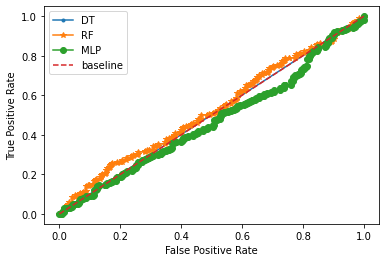

In [49]:
# plot the roc curve for the models
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DT')
plt.plot(rf_fpr,  rf_tpr,  marker='*', label='RF')
plt.plot(mlp_fpr, mlp_tpr, marker='o', label='MLP')
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## DJI

In [50]:
#INDICATORS
DJI['MA']    = ta.MA(DJI['Close'], timeperiod=30, matype=0)
DJI['RSI14'] = ta.RSI(DJI['Close'], timeperiod=14)
DJI['MACD'], MACDSIGNAL , MACDHIST = ta.MACD(DJI['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
DJI['OBV']   = ta.OBV(DJI['Close'], DJI['Volume'])
DJI['ROC']   = ta.ROC(DJI['Close'], timeperiod=10)
DJI['W%R']   = ta.WILLR(DJI['High'], DJI['Low'], DJI['Close'], timeperiod=14)
DJI['ATR']   = ta.ATR(DJI['High'], DJI['Low'],DJI['Close'], timeperiod=14)

DJI['SMA50'] = ta.SMA(DJI['Close'], timeperiod=50)
DJI['SMA200'] = ta.SMA(DJI['Close'], timeperiod=200)

DJI['EMA50']   = ta.MA(DJI['Close'], timeperiod=50, matype=0)
DJI['EMA200']   = ta.MA(DJI['Close'], timeperiod=200, matype=0)

DJI['BETA']  = ta.BETA(DJI['High'], DJI['Low'], timeperiod=5)
DJI['ADX']   = ta.ADX(DJI['High'], DJI['Low'], DJI['Close'], timeperiod=14)
DJI

,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX
Date,,,,,,,,,,,,,,,,,,,
2010-12-31,11597.410156,11530.320312,11569.330078,11577.509766,93330000,11577.509766,NaN,NaN,NaN,9.333000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,11711.469727,11577.349609,11577.429688,11670.750000,203420000,11670.750000,NaN,NaN,NaN,2.967500e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,11698.219727,11635.740234,11670.900391,11691.179688,178630000,11691.179688,NaN,NaN,NaN,4.753800e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,11742.679688,11652.889648,11688.610352,11722.889648,169990000,11722.889648,NaN,NaN,NaN,6.453700e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,11736.740234,11667.459961,11716.929688,11697.309570,193080000,11697.309570,NaN,NaN,NaN,4.522900e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28576.800781,28503.210938,28572.570312,28515.449219,86150000,28515.449219,28011.287370,69.197840,225.668785,3.575887e+10,2.272918,-8.910677,182.287328,27672.241094,26670.520127,27672.241094,26670.520127,0.576033,21.107674
2019-12-26,28624.099609,28535.150391,28539.460938,28621.390625,155970000,28621.390625,28042.284049,71.560907,237.302410,3.591484e+10,2.544094,-0.329440,177.027547,27704.172891,26685.112627,27704.172891,26685.112627,0.573683,22.311733
2019-12-27,28701.660156,28608.980469,28675.339844,28645.259766,182280000,28645.259766,28071.006380,72.080612,245.616864,3.609712e+10,1.824286,-6.267689,171.002700,27737.038477,26699.789229,27737.038477,26699.789229,0.572525,23.702622


In [51]:
generateUpDown(DJI) 
DJI

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,High,Low,Open,Close,Volume,Adj Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,,,,,,
2010-12-31,11597.410156,11530.320312,11569.330078,11577.509766,93330000,11577.509766,NaN,NaN,NaN,9.333000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-03,11711.469727,11577.349609,11577.429688,11670.750000,203420000,11670.750000,NaN,NaN,NaN,2.967500e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-04,11698.219727,11635.740234,11670.900391,11691.179688,178630000,11691.179688,NaN,NaN,NaN,4.753800e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011-01-05,11742.679688,11652.889648,11688.610352,11722.889648,169990000,11722.889648,NaN,NaN,NaN,6.453700e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2011-01-06,11736.740234,11667.459961,11716.929688,11697.309570,193080000,11697.309570,NaN,NaN,NaN,4.522900e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28576.800781,28503.210938,28572.570312,28515.449219,86150000,28515.449219,28011.287370,69.197840,225.668785,3.575887e+10,2.272918,-8.910677,182.287328,27672.241094,26670.520127,27672.241094,26670.520127,0.576033,21.107674,1
2019-12-26,28624.099609,28535.150391,28539.460938,28621.390625,155970000,28621.390625,28042.284049,71.560907,237.302410,3.591484e+10,2.544094,-0.329440,177.027547,27704.172891,26685.112627,27704.172891,26685.112627,0.573683,22.311733,1
2019-12-27,28701.660156,28608.980469,28675.339844,28645.259766,182280000,28645.259766,28071.006380,72.080612,245.616864,3.609712e+10,1.824286,-6.267689,171.002700,27737.038477,26699.789229,27737.038477,26699.789229,0.572525,23.702622,0


In [52]:
DJI = DJI.dropna() 
DJI1 = DJI.iloc[:, 3:4]
DJI2 = DJI.iloc[:, 6:21]
DJI  = pd.merge(DJI1, DJI2, on = 'Date')
DJI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,
2011-10-14,11644.490234,11177.077344,60.114762,57.080694,4.255300e+09,6.699211,-0.188342,247.962575,11200.777422,11968.458452,11200.777422,11968.458452,0.073677,17.326668,0
2011-10-17,11397.000000,11182.302018,53.422696,60.578412,4.114940e+09,6.960857,-20.109641,249.261007,11199.825215,11967.555903,11199.825215,11967.555903,0.371601,16.595799,1
2011-10-18,11577.049805,11196.893685,57.159125,76.991384,4.316350e+09,7.108525,-6.063724,256.929515,11215.169219,11967.087402,11215.169219,11967.087402,0.568592,15.586615,0
2011-10-19,11504.620117,11199.885677,55.239396,83.195288,4.146770e+09,5.161540,-11.866222,250.329569,11220.466230,11966.154604,11220.466230,11966.154604,0.477832,14.649516,1
2011-10-20,11541.780273,11208.084701,56.054871,90.072146,4.312870e+09,3.761915,-8.889242,246.028196,11236.903027,11965.249058,11236.903027,11965.249058,0.701087,13.759125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28515.449219,28011.287370,69.197840,225.668785,3.575887e+10,2.272918,-8.910677,182.287328,27672.241094,26670.520127,27672.241094,26670.520127,0.576033,21.107674,1
2019-12-26,28621.390625,28042.284049,71.560907,237.302410,3.591484e+10,2.544094,-0.329440,177.027547,27704.172891,26685.112627,27704.172891,26685.112627,0.573683,22.311733,1
2019-12-27,28645.259766,28071.006380,72.080612,245.616864,3.609712e+10,1.824286,-6.267689,171.002700,27737.038477,26699.789229,27737.038477,26699.789229,0.572525,23.702622,0


## Feature Selection -- Classification

In [54]:
X = DJI.drop(["Real","Close"], axis=1)  # Feature Matrix\
y = DJI["Real"]
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)             


# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['RSI14', 'MACD', 'ROC', 'W%R', 'ATR', 'BETA'], dtype='object')


In [55]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [56]:
# Feature Scale
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree

In [57]:
# Decision Tree Classifier: Create and Train the model
#
from sklearn.tree import DecisionTreeClassifier
X = DJI.drop(["Real","Close"], axis=1)  # Feature Matrix
y = DJI["Real"]
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) #training เพื่อสร้าง model

DecisionTreeClassifier()

In [58]:
# Prediction
# เอา model มาใช้
y_pred = dtc.predict(X_test)  #Accuracy
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [59]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5261121856866537
Prediction recall Score: 0.5191904935348752
Prediction F1_score:  0.5768566493955095
Prediction Precision:  0.5758620689655173


In [60]:
# See the confusion matrix
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[105, 123],
       [122, 167]], dtype=int64)

## Random Forest -- DJI

In [61]:
# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [62]:
 # Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
y_test

Date
2017-03-09    1
2013-05-07    1
2018-06-18    0
2012-05-30    0
2018-07-10    0
             ..
2014-04-03    0
2015-01-12    0
2012-11-13    0
2018-10-16    0
2017-06-27    1
Name: Real, Length: 517, dtype: int64

In [64]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5589941972920697
Prediction recall Score: 0.5004628786499119
Prediction F1_score:  0.7164179104477613
Prediction Precision:  0.5592233009708738


In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  1, 227],
       [  1, 288]], dtype=int64)

## Artificial Neural Network (ANN) -- SSE

In [66]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [67]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [68]:
y_test

Date
2017-03-09    1
2013-05-07    1
2018-06-18    0
2012-05-30    0
2018-07-10    0
             ..
2014-04-03    0
2015-01-12    0
2012-11-13    0
2018-10-16    0
2017-06-27    1
Name: Real, Length: 517, dtype: int64

In [69]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.4951644100580271
Prediction recall Score: 0.47715959448795
Prediction F1_score:  0.5824
Prediction Precision:  0.5416666666666666


In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 74, 154],
       [107, 182]], dtype=int64)

## Logistic Regression -- SSE

In [71]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [72]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
y_test

Date
2017-03-09    1
2013-05-07    1
2018-06-18    0
2012-05-30    0
2018-07-10    0
             ..
2014-04-03    0
2015-01-12    0
2012-11-13    0
2018-10-16    0
2017-06-27    1
Name: Real, Length: 517, dtype: int64

In [74]:
from sklearn import metrics

pred_accuracy = metrics.accuracy_score(y_test, y_pred)
    
pred_recall = metrics.recall_score(y_test, y_pred, average ='macro')
pred_f1_score = metrics.f1_score(y_test, y_pred)
pred_precision = metrics.precision_score(y_test, y_pred)

print('Prediction Accuracy Score:', pred_accuracy )
print('Prediction recall Score:', pred_recall )
print("Prediction F1_score: ", pred_f1_score )
print("Prediction Precision: ", pred_precision)

Prediction Accuracy Score: 0.5299806576402321
Prediction recall Score: 0.48515753050446186
Prediction F1_score:  0.6729475100942126
Prediction Precision:  0.5506607929515418


In [75]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 24, 204],
       [ 39, 250]], dtype=int64)

## ROC AUC -- SSE

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
bl_probs = [0 for _ in range(len(y_test))]

# predict DTC probabilities
dtc_probs = dtc.predict_proba(X_test)

# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]

# predict RF probabilities
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predict MLP probabilities
mlp_probs = mlp.predict_proba(X_test)

# keep probabilities for the positive outcome only
mlp_probs = mlp_probs[:, 1]

# predict MLP probabilities
lr_probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
           

In [77]:
# calculate scores
bl_auc = roc_auc_score(y_test, bl_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc  = roc_auc_score(y_test, rf_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('NoSkill: ROC AUC=%.3f' % bl_auc)
print('DTC:     ROC AUC=%.3f' % dtc_auc)
print('RF :     ROC AUC=%.3f' % rf_auc)
print('MLP:     ROC AUC=%.3f' % mlp_auc)
print('LGTR :     ROC AUC=%.3f' % lr_auc)
# calculate ROC curves to plt
bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rf_fpr,  rf_tpr, _  = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#

NoSkill: ROC AUC=0.500
DTC:     ROC AUC=0.519
RF :     ROC AUC=0.478
MLP:     ROC AUC=0.478
LGTR :     ROC AUC=0.480


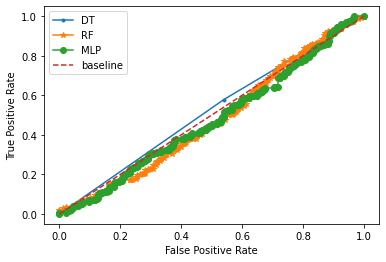

In [78]:
# plot the roc curve for the models
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DT')
plt.plot(rf_fpr,  rf_tpr,  marker='*', label='RF')
plt.plot(mlp_fpr, mlp_tpr, marker='o', label='MLP')
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

## Regression -- DJI

In [79]:
# no. of features
#
X = DJI.drop(["Real","MA","EMA50","EMA200","SMA50", "SMA200","Close"], axis=1)  # Feature Matrix
y = DJI["Close"]
nof_list = np.arange(1, 11)            
high_score = 0

# Variable to store the optimum features
#
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)

    score = model.score(X_test_rfe,y_test)
    score_list.append(score)

    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.926725


In [80]:

cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model, n_features_to_select=5)             


# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'ROC', 'W%R', 'ATR', 'BETA'], dtype='object')


In [81]:
# Split the dataset into the Training set and Test set
#
X = DJI.loc[:, selected_features_rfe]
y = DJI["Close"]

from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Linear Regression -- DJI

In [82]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred


array([19922.60819132, 17509.06621717, 20076.80416194, 14367.29739126,
       19992.77389792, 13425.93437324, 21619.65649844, 14090.54741925,
       15145.84669515, 19383.15464765, 16860.96037547, 20415.82507894,
       24752.77361961, 19129.11563208, 17989.80589582, 16799.56988468,
       22188.90932055, 21216.34465819, 26641.82158942, 21389.67366242,
       19540.30336589, 16588.59413611, 21569.97300801, 22048.93706255,
       17159.64340497, 19734.72759831, 18081.98942792, 19418.90768981,
       22860.58035488, 16264.78739435, 22114.68734759, 15529.70932436,
       15469.58384071, 20781.91295666, 19907.81194121, 15169.84852551,
       17628.53292256, 15712.89647703, 17299.91689102, 12697.65591386,
       15723.96326823, 19452.9662446 , 16117.32413688, 21973.99250074,
       19232.47909206, 19654.19352037, 24757.45301681, 19546.54180304,
       16734.82484425, 23059.19667118, 20630.65865045, 18092.49845516,
       18034.6014992 , 26347.9315679 , 18622.49054223, 13234.00344576,
      

In [83]:
len(y_pred)

517

In [84]:
mean_squared = np.sqrt(mean_squared_error(y_test, y_pred))
mean_squared #RMSE

3498.7684095509762

In [85]:
mean_r = r2_score(y_test, y_pred)
mean_r #R2 Score Accuracy

0.4363059669035245

## AdaBoostRegressor-- DJI

In [86]:
X = DJI.drop(["Real","MA","EMA50","EMA200","Close"], axis=1)  # Feature Matrix
y = DJI['Close']
cols = list(X.columns)
model = LinearRegression()

# Initializing RFE model
rfe = RFE(model)            
#, n_features_to_select=6

# Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

# Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)


Index(['RSI14', 'MACD', 'ROC', 'W%R', 'BETA'], dtype='object')


In [87]:
X = DJI.loc[:, selected_features_rfe]
y = DJI["Close"]
X

,RSI14,MACD,ROC,W%R,BETA
Date,,,,,
2011-10-14,60.114762,57.080694,6.699211,-0.188342,0.073677
2011-10-17,53.422696,60.578412,6.960857,-20.109641,0.371601
2011-10-18,57.159125,76.991384,7.108525,-6.063724,0.568592
2011-10-19,55.239396,83.195288,5.161540,-11.866222,0.477832
2011-10-20,56.054871,90.072146,3.761915,-8.889242,0.701087
...,...,...,...,...,...
2019-12-24,69.197840,225.668785,2.272918,-8.910677,0.576033
2019-12-26,71.560907,237.302410,2.544094,-0.329440,0.573683
2019-12-27,72.080612,245.616864,1.824286,-6.267689,0.572525


In [88]:
DJI

,Close,MA,RSI14,MACD,OBV,ROC,W%R,ATR,SMA50,SMA200,EMA50,EMA200,BETA,ADX,Real
Date,,,,,,,,,,,,,,,
2011-10-14,11644.490234,11177.077344,60.114762,57.080694,4.255300e+09,6.699211,-0.188342,247.962575,11200.777422,11968.458452,11200.777422,11968.458452,0.073677,17.326668,0
2011-10-17,11397.000000,11182.302018,53.422696,60.578412,4.114940e+09,6.960857,-20.109641,249.261007,11199.825215,11967.555903,11199.825215,11967.555903,0.371601,16.595799,1
2011-10-18,11577.049805,11196.893685,57.159125,76.991384,4.316350e+09,7.108525,-6.063724,256.929515,11215.169219,11967.087402,11215.169219,11967.087402,0.568592,15.586615,0
2011-10-19,11504.620117,11199.885677,55.239396,83.195288,4.146770e+09,5.161540,-11.866222,250.329569,11220.466230,11966.154604,11220.466230,11966.154604,0.477832,14.649516,1
2011-10-20,11541.780273,11208.084701,56.054871,90.072146,4.312870e+09,3.761915,-8.889242,246.028196,11236.903027,11965.249058,11236.903027,11965.249058,0.701087,13.759125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28515.449219,28011.287370,69.197840,225.668785,3.575887e+10,2.272918,-8.910677,182.287328,27672.241094,26670.520127,27672.241094,26670.520127,0.576033,21.107674,1
2019-12-26,28621.390625,28042.284049,71.560907,237.302410,3.591484e+10,2.544094,-0.329440,177.027547,27704.172891,26685.112627,27704.172891,26685.112627,0.573683,22.311733,1
2019-12-27,28645.259766,28071.006380,72.080612,245.616864,3.609712e+10,1.824286,-6.267689,171.002700,27737.038477,26699.789229,27737.038477,26699.789229,0.572525,23.702622,0


In [91]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split #test_size = สัดส่วน
X = DJI.loc[:, selected_features_rfe]
y = DJI["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train, y_train)

In [93]:
y_test

Date
2017-03-09    20858.189453
2013-05-07    15056.200195
2018-06-18    24987.470703
2012-05-30    12419.860352
2018-07-10    24919.660156
                  ...     
2014-04-03    16572.550781
2015-01-12    17640.839844
2012-11-13    12756.179688
2018-10-16    25798.419922
2017-06-27    21310.660156
Name: Close, Length: 517, dtype: float64

In [94]:
y_pred = ada.predict(X_test)
y_pred


array([23731.86957067, 17567.16325129, 19646.90041644, 18660.27867601,
       17849.2297744 , 17856.20401969, 18960.11584485, 18960.11584485,
       18589.43400502, 20479.26803039, 17567.16325129, 21275.88441984,
       17567.16325129, 18589.43400502, 18960.11584485, 18960.11584485,
       23070.535226  , 23070.535226  , 18960.11584485, 22003.05608001,
       18660.27867601, 18589.43400502, 23070.535226  , 23731.86957067,
       17849.2297744 , 23731.86957067, 18960.11584485, 17567.16325129,
       23731.86957067, 17567.16325129, 20183.86563847, 18960.11584485,
       17567.16325129, 20479.26803039, 21110.33765388, 18660.27867601,
       17567.16325129, 17567.16325129, 17567.16325129, 18660.27867601,
       18960.11584485, 21110.33765388, 18960.11584485, 21275.88441984,
       18540.39316998, 23070.535226  , 18589.43400502, 19646.90041644,
       19986.59165544, 20395.56876217, 17567.16325129, 17849.2297744 ,
       19067.88914946, 23731.86957067, 17856.20401969, 17849.2297744 ,
      

In [95]:
mean_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mean_2 #RMSE

4137.269489388618

In [96]:
mean_r2 = metrics.r2_score(y_test, y_pred)
mean_r2 #R2 Score Accuracy

0.21179231415479793